<a href="https://colab.research.google.com/github/zainab9271/AI-Dojo_Machine_learning_bootcamp/blob/main/Assignment_04_Zainab_Mahmood_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 04: Deep Learning Algorithms 

This Week's assignment is to train Deep Learning and Machine Learning algorithms on the `fashion_mnist` images dataset to accurately predict the type of clothes in the image.

Before starting copy this file and work on your own copy by following the below steps: 
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 04: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/10/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the machine learning project.
2. Download the dataset using `tf.keras.datasets`.
3. Make sure the pixels values are scaled between (`0-1`).
4. Make sure to convert the target into one hot vector.
5. Train six different Machine Learning models (`KNN`, `Logistics Regression`, `Support Vector Machine`, `Decision Tree`, `Random Forest`, `DNN`).


6. Make sure to achieve the following results for the testing data:
<br> Accuracy equal or above "95%", and Loss equal or below "0.1". 
7. Plot the loss and validation loss values from the training history of the DNN model.
8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model.

Find relevant links below:

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLScPUIMjrlCk9Px0ioSE9xLViJO9r-Q1EymwXxXcJmQuHmIEHA/viewform?usp=pp_url)

Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the machine learning project.

In [ ]:
# import the necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, neighbors, linear_model, svm, tree, ensemble

# 2- Download the dataset using tf.keras.dataset

In [ ]:
# download the required dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

9


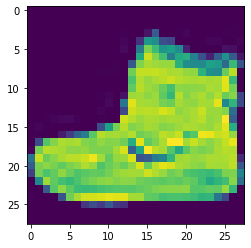

In [ ]:
# plot image samples from the dataset 

plt.imshow(x_train[0])
print(y_train[0])

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


<BarContainer object of 10 artists>

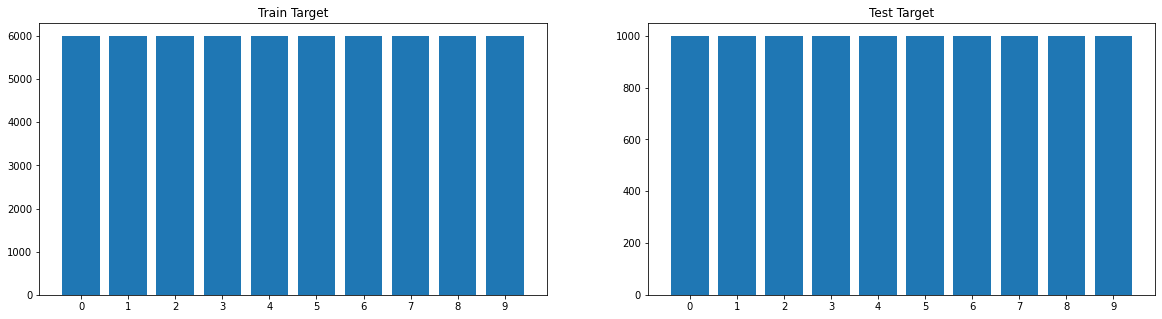

In [ ]:
# plot the histogram of the target from the training and testing distribution 

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Train Target')
plt.xticks(list(set(y_train)))
plt.bar(list(set(y_train)), np.bincount(y_train))
# plt.hist(y_train)
plt.subplot(1,2,2)
plt.title('Test Target')
plt.xticks(list(set(y_test)))
plt.bar(list(set(y_test)), np.bincount(y_test))
# plt.hist(y_test)

# 3- Make sure the pixels values are scaled between (0-1)

In [ ]:
# scale the pixels values between 0-1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0


In [ ]:
# convert the images into vectors
x_train_vector = x_train_scaled.reshape(-1,28*28)
x_test_vector = x_test_scaled.reshape(-1,28*28)

# 4- Make sure to convert the target into one hot vector

In [ ]:
# encode the training and testing target into one hot vector

y_train_hot = tf.one_hot(y_train, depth=len(set(y_train)))
y_test_hot = tf.one_hot(y_test, depth=len(set(y_test)))

# 5- Modeling
Train six different models (KNN, Logistics Regression, Support Vector Machine, Decision Tree, Random Forest, DNN)


**Note:**
1. Make sure to saperate each model in a new sub-section.
2. Make sure to achieve the following results for the testing data: 
<br> Accuracy equal or above "95%", and Loss equal or below "0.1".
3. Plot the loss and validation loss values from the training history of the DNN model.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## KNN Model

In [ ]:
# build the model

knn =neighbors.KNeighborsClassifier(n_neighbors=4, weights= 'distance', n_jobs=-1)
knn.fit(x_train_vector, y_train)
y_pred_knn = knn.predict(x_test_vector)

### Model evaluation

In [ ]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred_knn))
print('\n')
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred_knn, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred_knn, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, y_pred_knn, average="weighted")}')

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.77      0.78      1000
           5       1.00      0.83      0.91      1000
           6       0.63      0.63      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.98      0.96      0.97      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Accuracy Score = 0.8597
Precision Score = 0.862625227284344
Recall Score = 0.8597
F1 Score = 0.8599842913135268


## Logistics Regression Model

In [ ]:
log_reg = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
log_reg.fit(x_train_vector, y_train)
y_pred_logReg = log_reg.predict(x_test_vector)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Model Evaluation

In [ ]:
print(metrics.classification_report(y_test, y_pred_logReg))
print('\n')
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred_logReg)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred_logReg, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred_logReg, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, y_pred_logReg, average="weighted")}')

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.75      1000
           5       0.94      0.93      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Accuracy Score = 0.8444
Precision Score = 0.842868165144033
Recall Score = 0.8444
F1 Score = 0.8433225878515057


## Support Vector Machine Model

In [ ]:
svc = svm.SVC(kernel='rbf')
svc.fit(x_train_vector, y_train)
y_pred_svc = svc.predict(x_test_vector)

### Model Evaluation 

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))
print('\n')
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred_svc)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred_svc, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred_svc, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, y_pred_svc, average="weighted")}')

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Accuracy Score = 0.8828
Precision Score = 0.882309111843896
Recall Score = 0.8828
F1 Score = 0.8822648793630384


## Decision Tree Model

In [ ]:
dcs_tree = tree.DecisionTreeClassifier(random_state=42)
dcs_tree.fit(x_train_vector, y_train)
y_pred_dcsTree = dcs_tree.predict(x_test_vector)

### Model Evaluation 

In [ ]:
print(metrics.classification_report(y_test, y_pred_dcsTree))
print('\n')
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred_dcsTree)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred_dcsTree, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred_dcsTree, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, y_pred_dcsTree, average="weighted")}')

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.96      0.95      0.95      1000
           2       0.63      0.65      0.64      1000
           3       0.82      0.79      0.80      1000
           4       0.64      0.63      0.64      1000
           5       0.90      0.89      0.89      1000
           6       0.52      0.55      0.53      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



Accuracy Score = 0.7888
Precision Score = 0.7907944419130593
Recall Score = 0.7888
F1 Score = 0.7896654287555152


## Random Forest Model

In [ ]:
rndF = ensemble.RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
rndF.fit(x_train_vector, y_train)
y_pred_rndF = rndF.predict(x_test_vector)

### Model Evaluation 

In [ ]:
print(metrics.classification_report(y_test, y_pred_rndF))
print('\n')
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred_rndF)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred_rndF, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred_rndF, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, y_pred_rndF, average="weighted")}')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



Accuracy Score = 0.8764
Precision Score = 0.8752371479336912
Recall Score = 0.8764
F1 Score = 0.8748940960944325


## DNN Model

### Sequential

In [ ]:
tf.keras.backend.clear_session()
model_sequential = tf.keras.Sequential(
    [
     tf.keras.layers.Input(shape=(784), name= 'input_Layer'),
     tf.keras.layers.Dense(units= 256, activation= tf.nn.relu, kernel_initializer= tf.initializers.HeUniform(seed = 42), name='dense_01'),
     tf.keras.layers.Dropout(rate=0.4),
     tf.keras.layers.Dense(units= 256, activation= tf.nn.relu, kernel_initializer= tf.initializers.HeUniform(seed = 42), name='dense_02'),
     tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.Dense(units= 256, activation= tf.nn.relu, kernel_initializer= tf.initializers.HeUniform(seed = 42), name='dense_03'),
     tf.keras.layers.Dropout(rate=0.25),
     tf.keras.layers.Dense(units=10, activation= tf.nn.softmax, name= 'output')
    ]
)
print(model_sequential.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_02 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_03 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 output (Dense)              (None, 10)                2

#### Model Training

In [ ]:
model_sequential.compile(optimizer=tf.optimizers.Adam(), loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
model_sequential.fit(x_train_vector, y_train_hot, epochs=10, validation_data=(x_test_vector, y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6489 - acc: 0.7650 - val_loss: 0.4686 - val_acc: 0.8266
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4888 - acc: 0.8231 - val_loss: 0.4161 - val_acc: 0.8461
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4496 - acc: 0.8385 - val_loss: 0.4111 - val_acc: 0.8487
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4321 - acc: 0.8453 - val_loss: 0.3955 - val_acc: 0.8616
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4177 - acc: 0.8500 - val_loss: 0.3724 - val_acc: 0.8649
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4047 - acc: 0.8532 - val_loss: 0.3824 - val_acc: 0.8606
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3955 - acc: 0.8585 - val_loss: 0.3760 - val_acc: 0.8659
Epoch 8/10
1875/1875 [==============================] -

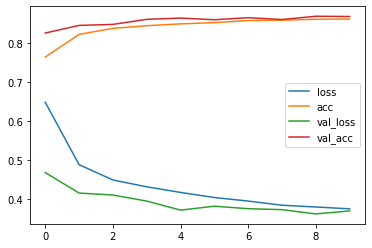

In [ ]:
pd.DataFrame(model_sequential.history.history).plot()

#### Model Evaluation

In [ ]:
pred_seqModel = model_sequential.predict(x_test_vector)
pred_seqModel = np.argmax(pred_seqModel,axis=-1)
print(metrics.classification_report(y_test, pred_seqModel))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.72      0.75      1000
           3       0.89      0.89      0.89      1000
           4       0.72      0.85      0.78      1000
           5       0.98      0.95      0.96      1000
           6       0.70      0.56      0.63      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(f'Accuracy Score = {metrics.accuracy_score(y_test, pred_seqModel)}')
print(f'Precision Score = {metrics.precision_score(y_test, pred_seqModel, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, pred_seqModel, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, pred_seqModel, average="weighted")}')

Accuracy Score = 0.8689
Precision Score = 0.8694478818608142
Recall Score = 0.8689
F1 Score = 0.8672024346482711


### Subclassing

In [ ]:
tf.keras.backend.clear_session()
class DNN_Block(tf.keras.layers.Layer):
    def __init__(self, units_list = [], dropout_rate_list=[], **kwargs):
        super(DNN_Block, self).__init__(**kwargs)
        
        self.dense_1 = tf.keras.layers.Dense(units=units_list[0], kernel_initializer= tf.initializers.he_uniform())
        self.dropout_1 = tf.keras.layers.Dropout(rate=dropout_rate_list[0], seed=42)
        
        self.dense_2 = tf.keras.layers.Dense(units=units_list[1], kernel_initializer= tf.initializers.he_uniform())
        self.dropout_2 = tf.keras.layers.Dropout(rate=dropout_rate_list[1], seed=42)

    def call(self, inputs):
        
        x = tf.nn.relu(self.dense_1(inputs))
        x = self.dropout_1(x)
        
        x = tf.nn.relu(self.dense_2(x))
        x = self.dropout_2(x)
        # concatenating the result of dropout_2 with inputs causes high overfitting for DNN model
        return x


class DNN_Model(tf.keras.Model):
    def __init__(self):
        super(DNN_Model, self).__init__()

        self.block_1 = DNN_Block(units_list=[512,256], dropout_rate_list=[0.35,0.25], name='block_1')
        self.block_2 = DNN_Block(units_list=[256,512], dropout_rate_list=[0.25,0.25], name='block_2')

        self.out = tf.keras.layers.Dense(10, name='out')

    def call(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        
        x = tf.nn.softmax(self.out(x))
       
        return x

    def build_model(self):
        x = tf.keras.layers.Input((784))
        return tf.keras.Model(inputs = [x], outputs = [self.call(x)])


dnn_model = DNN_Model()
print(dnn_model.build_model().summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 block_1 (DNN_Block)         (None, 256)               533248    
                                                                 
 block_2 (DNN_Block)         (None, 512)               197376    
                                                                 
 out (Dense)                 (None, 10)                5130      
                                                                 
 tf.nn.softmax (TFOpLambda)  (None, 10)                0         
                                                                 
Total params: 735,754
Trainable params: 735,754
Non-trainable params: 0
_________________________________________________________________
None


#### Model Training

In [ ]:
dnn_model.compile(optimizer=tf.optimizers.Adam(), loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
dnn_model.fit(x=x_train_vector, y=y_train_hot, epochs=10, batch_size=32, validation_data=(x_test_vector, y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6414 - acc: 0.7665 - val_loss: 0.5139 - val_acc: 0.8119
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4860 - acc: 0.8285 - val_loss: 0.4442 - val_acc: 0.8407
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4501 - acc: 0.8408 - val_loss: 0.3947 - val_acc: 0.8538
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4277 - acc: 0.8478 - val_loss: 0.3931 - val_acc: 0.8575
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4137 - acc: 0.8543 - val_loss: 0.3789 - val_acc: 0.8646
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3980 - acc: 0.8577 - val_loss: 0.3848 - val_acc: 0.8603
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3913 - acc: 0.8625 - val_loss: 0.3773 - val_acc: 0.8684
Epoch 8/10
1875/1875 [==========================

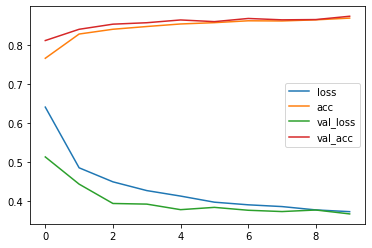

In [ ]:
pd.DataFrame(dnn_model.history.history).plot()

#### Model Evaluation

In [ ]:
pred_subClass = dnn_model.predict(x_test_vector)
pred_subClass = np.argmax(pred_subClass,axis=-1)
print(metrics.classification_report(y_test, pred_subClass))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.79      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.79      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.66      0.64      0.65      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(f'Accuracy Score = {metrics.accuracy_score(y_test, pred_subClass)}')
print(f'Precision Score = {metrics.precision_score(y_test, pred_subClass, average="weighted")}')
print(f'Recall Score = {metrics.recall_score(y_test, pred_subClass, average="weighted")}')
print(f'F1 Score = {metrics.f1_score(y_test, pred_subClass, average="weighted")}')

Accuracy Score = 0.8741
Precision Score = 0.8746163676281936
Recall Score = 0.8741
F1 Score = 0.8741663322630627


<font size='5' color='magenta'>I tried to keep my models away from overfitting, which is why I couldn't get 90% accuracy.</font>